<table class="tfo-notebook-buttons" align="left">
<td style="border: none;">
<a target="blank" href="https://colab.research.google.com/github/Hari31416/PYL800/blob/main/Codes/Assignment1/Assignment1.ipynb?hl=en"><img src="https://colab.research.google.com/img/colab_favicon_256px.png" width="28" height="28"/>Run on Google Colab</a></td>
<td style="border: none;">
<a target="blank" href="https://github.com/Hari31416/PYL800/blob/main/Codes/Assignment1/Assignment1.ipynb"><img src="https://cdn.icon-icons.com/icons2/2368/PNG/512/github_logo_icon_143772.png" width="28" height="28"/>View on Github</a></td>
<td style="border: none;">
</table>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

In [2]:
def give_energy(K, h=1, m=1):
    """
    This function calculates the energy of a particle in a potential
    field.
    """
    return (h**2*K**2)/(2*m)

give_energy = np.vectorize(give_energy)

## 2D Case

### Plotting the solution

For two dimensions, we have:
$$ E_k = \frac{E_K^0+ E_{K+G}^0}{2}\pm |V_G| $$
With $E_K^0$ and $E_K+G^0$ being the energies of the two states, and $V_G$ the energy gap.
Here
$$ E_K^0 = \frac{\hbar^2K^2}{2m} $$
$$ E_{K+G}^0 = \frac{\hbar^2{(K+G)}^2}{2m} $$
With 
$$ G =\pm \frac{2\pi}{a} $$

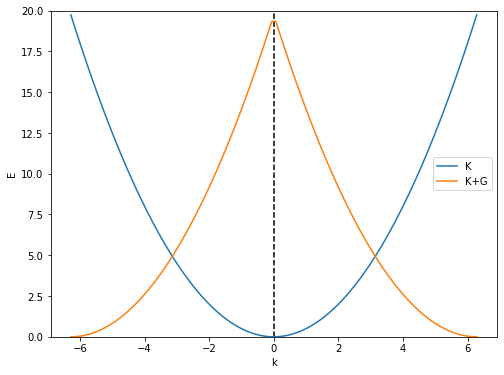

In [3]:
plt.figure(figsize=(8,6))
k = np.linspace(-2*np.pi, 2*np.pi, 100)
EK1 = give_energy(K=k)
EK2 = np.zeros(EK1.shape)

for i,j in enumerate(list(k)):
    if j>0:
        EK2[i] = give_energy(K=j-2*np.pi)
    else:
        EK2[i] = give_energy(K=j+2*np.pi)
plt.plot(k, EK1, label='K')
plt.plot(k, EK2, label='K+G')
plt.xlabel('k')
plt.ylabel('E')
plt.vlines(0,0,20, color='black', linestyle='dashed')
plt.legend()
plt.ylim(0,20);

### Solving and then plotting

The matrix is
$$
\begin{bmatrix}
E_K^0 -E & V_{-G} \\
V_G & E_{K+G}^0 -E
\end{bmatrix}
$$

In [4]:
EK = Symbol('EK')
EKG = Symbol('EKG')
VG = Symbol('VG', complex=True)
VmG = VG.conjugate()
E = Symbol('E')

In [5]:
mat2d = Matrix([[EK-E, VmG], [VG, EKG-E]])
mat2d

Matrix([
[-E + EK, conjugate(VG)],
[     VG,      -E + EKG]])

In [6]:
#Getting the determinant
eq2d = mat2d.det()
#Substituting Vp=1 to simplify the equation
eq2d = eq2d.subs(VG, 1)
eq2d

E**2 - E*EK - E*EKG + EK*EKG - 1

In [7]:
#Solving the equation
E2ds = solve(eq2d, E)
len(E2ds)

2

In [8]:
E2d1 = E2ds[0]
E2d2 = E2ds[1]
E2d1, E2d2

(EK/2 + EKG/2 - sqrt(EK**2 - 2*EK*EKG + EKG**2 + 4)/2,
 EK/2 + EKG/2 + sqrt(EK**2 - 2*EK*EKG + EKG**2 + 4)/2)

In [9]:
def substitue2d(E, K, **kwargs):
    """
    Takes one value of R and returns numerical value of E after making all the substitutions
    """
    #Substituing EK
    E_num = E.subs(EK, give_energy(K=K, **kwargs))
    #Substituing EKG which is nothing but E0 with K= K + G and as G = 2*pi, so K = K + 2*pi
    E_num = E_num.subs(EKG, give_energy(K=K+2*np.pi, **kwargs))
    E_num = E_num.evalf()
    #Sometimes, we are getting a complex number, with very small imaginary part(ususally < 1e-15)
    #because of the precision of the computer. So, we are removing the imaginary part.
    E_num = E_num.subs(I, 0)
    return E_num

#Finally, we'll make the function a vectorized function
substitue2d = np.vectorize(substitue2d)

In [10]:
display(substitue2d(E2d1, K=0))
display(substitue2d(E2d2, K=0))
display(substitue2d(E2d1, K=np.pi))
display(substitue2d(E2d2, K=np.pi))

array(-0.0505312347778464, dtype=object)

array(19.7897400369566, dtype=object)

array(4.90948813633450, dtype=object)

array(44.4385338691123, dtype=object)

In [11]:
#Defining K values
K = np.linspace(-2*np.pi, 2*np.pi, 100)

#Getting the values of energies
Ev1 = substitue2d(E2d1, K)
Ev2 = substitue2d(E2d2, K)

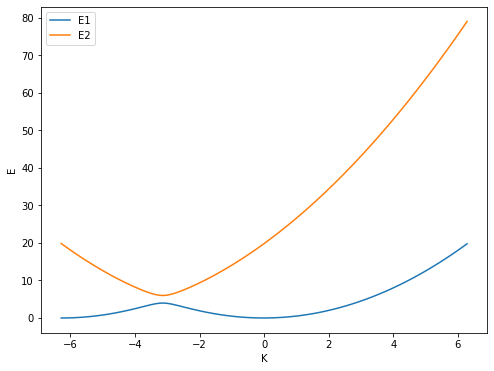

In [12]:
#Making the plots
plt.figure(figsize=(8,6))
plt.plot(K, Ev1, label='E1')
plt.plot(K, Ev2, label='E2')
plt.xlabel('K')
plt.ylabel('E')
plt.legend()

## 3D Case

The equation is written as:
$$
\begin{bmatrix}
\frac{\hbar^2k^2}{2m}-E & V_{\frac{-2\pi}{a}}& V_{\frac{2\pi}{a}} \\
V_{\frac{2\pi}{a}} & \frac{\hbar^2(k+\frac{2\pi}{a})^2}{2m}-E & V_{\frac{-2\pi}{a}} \\
V_{\frac{-2\pi}{a}} & V_{\frac{2\pi}{a}} & \frac{\hbar^2(k-\frac{2\pi}{a})^2}{2m}-E
\end{bmatrix}
=0
$$
We need to solve this for E.

In [13]:
#Setting the variables
E = Symbol('E')
Vp = Symbol('V', complex=True)
Vm = Vp.conjugate()
E0 = Symbol('E0')
Ep = Symbol('Ep')
Em = Symbol('Em')

In [14]:
#Creating the matrix
mat = Matrix([[E0-E, Vm, Vp], [Vm, Ep-E, Vp], [Vp, Vm, Em-E]])
mat

Matrix([
[     -E + E0, conjugate(V),       V],
[conjugate(V),      -E + Ep,       V],
[           V, conjugate(V), -E + Em]])

In [15]:
#Getting the determinant
eq = mat.det()
#Substituting Vp=1 to simplify the equation
eq = eq.subs(Vp, 1)
eq

-E**3 + E**2*E0 + E**2*Em + E**2*Ep - E*E0*Em - E*E0*Ep - E*Em*Ep + 3*E + E0*Em*Ep - E0 - Em - Ep + 2

Now, we need to solve for E in terms of $E_0$, $E_M$ and $E_P$.

In [16]:
Es = solve(eq, E)
len(Es)

3

Since the equation was third order, we get three different solutions of E, the solutions are:

In [17]:
E1 = Es[0]
E1

E0/3 + Em/3 + Ep/3 - (-3*E0*Em - 3*E0*Ep - 3*Em*Ep + (-E0 - Em - Ep)**2 + 9)/(3*(-27*E0*Em*Ep/2 + 27*E0/2 + 27*Em/2 + 27*Ep/2 + sqrt(-4*(-3*E0*Em - 3*E0*Ep - 3*Em*Ep + (-E0 - Em - Ep)**2 + 9)**3 + (-27*E0*Em*Ep + 27*E0 + 27*Em + 27*Ep - (-9*E0 - 9*Em - 9*Ep)*(E0*Em + E0*Ep + Em*Ep - 3) + 2*(-E0 - Em - Ep)**3 - 54)**2)/2 - (-9*E0 - 9*Em - 9*Ep)*(E0*Em + E0*Ep + Em*Ep - 3)/2 + (-E0 - Em - Ep)**3 - 27)**(1/3)) - (-27*E0*Em*Ep/2 + 27*E0/2 + 27*Em/2 + 27*Ep/2 + sqrt(-4*(-3*E0*Em - 3*E0*Ep - 3*Em*Ep + (-E0 - Em - Ep)**2 + 9)**3 + (-27*E0*Em*Ep + 27*E0 + 27*Em + 27*Ep - (-9*E0 - 9*Em - 9*Ep)*(E0*Em + E0*Ep + Em*Ep - 3) + 2*(-E0 - Em - Ep)**3 - 54)**2)/2 - (-9*E0 - 9*Em - 9*Ep)*(E0*Em + E0*Ep + Em*Ep - 3)/2 + (-E0 - Em - Ep)**3 - 27)**(1/3)/3

In [18]:
E2 = Es[1]
E2

E0/3 + Em/3 + Ep/3 - (-3*E0*Em - 3*E0*Ep - 3*Em*Ep + (-E0 - Em - Ep)**2 + 9)/(3*(-1/2 - sqrt(3)*I/2)*(-27*E0*Em*Ep/2 + 27*E0/2 + 27*Em/2 + 27*Ep/2 + sqrt(-4*(-3*E0*Em - 3*E0*Ep - 3*Em*Ep + (-E0 - Em - Ep)**2 + 9)**3 + (-27*E0*Em*Ep + 27*E0 + 27*Em + 27*Ep - (-9*E0 - 9*Em - 9*Ep)*(E0*Em + E0*Ep + Em*Ep - 3) + 2*(-E0 - Em - Ep)**3 - 54)**2)/2 - (-9*E0 - 9*Em - 9*Ep)*(E0*Em + E0*Ep + Em*Ep - 3)/2 + (-E0 - Em - Ep)**3 - 27)**(1/3)) - (-1/2 - sqrt(3)*I/2)*(-27*E0*Em*Ep/2 + 27*E0/2 + 27*Em/2 + 27*Ep/2 + sqrt(-4*(-3*E0*Em - 3*E0*Ep - 3*Em*Ep + (-E0 - Em - Ep)**2 + 9)**3 + (-27*E0*Em*Ep + 27*E0 + 27*Em + 27*Ep - (-9*E0 - 9*Em - 9*Ep)*(E0*Em + E0*Ep + Em*Ep - 3) + 2*(-E0 - Em - Ep)**3 - 54)**2)/2 - (-9*E0 - 9*Em - 9*Ep)*(E0*Em + E0*Ep + Em*Ep - 3)/2 + (-E0 - Em - Ep)**3 - 27)**(1/3)/3

In [19]:
E3  = Es[2]
E3

E0/3 + Em/3 + Ep/3 - (-3*E0*Em - 3*E0*Ep - 3*Em*Ep + (-E0 - Em - Ep)**2 + 9)/(3*(-1/2 + sqrt(3)*I/2)*(-27*E0*Em*Ep/2 + 27*E0/2 + 27*Em/2 + 27*Ep/2 + sqrt(-4*(-3*E0*Em - 3*E0*Ep - 3*Em*Ep + (-E0 - Em - Ep)**2 + 9)**3 + (-27*E0*Em*Ep + 27*E0 + 27*Em + 27*Ep - (-9*E0 - 9*Em - 9*Ep)*(E0*Em + E0*Ep + Em*Ep - 3) + 2*(-E0 - Em - Ep)**3 - 54)**2)/2 - (-9*E0 - 9*Em - 9*Ep)*(E0*Em + E0*Ep + Em*Ep - 3)/2 + (-E0 - Em - Ep)**3 - 27)**(1/3)) - (-1/2 + sqrt(3)*I/2)*(-27*E0*Em*Ep/2 + 27*E0/2 + 27*Em/2 + 27*Ep/2 + sqrt(-4*(-3*E0*Em - 3*E0*Ep - 3*Em*Ep + (-E0 - Em - Ep)**2 + 9)**3 + (-27*E0*Em*Ep + 27*E0 + 27*Em + 27*Ep - (-9*E0 - 9*Em - 9*Ep)*(E0*Em + E0*Ep + Em*Ep - 3) + 2*(-E0 - Em - Ep)**3 - 54)**2)/2 - (-9*E0 - 9*Em - 9*Ep)*(E0*Em + E0*Ep + Em*Ep - 3)/2 + (-E0 - Em - Ep)**3 - 27)**(1/3)/3

Final step is evaluating the energy of the system by substituting the values of $E_P$, $E_M$ and $E_0$ into the equation. We already has a function `give_energy` that returns the energy E, given k, m and a. By default, $m=a=1$.

In [20]:
def substitute(E, K, **kwargs):
    """
    Takes one value of R and returns numerical value of E after making all the substitutions
    """
    #Substituing E0
    E_num = E.subs(E0, give_energy(K=K, **kwargs))
    #Substituing Ep which is nothing but E0 with K= K + G and as G = 2*pi, so K = K + 2*pi
    E_num = E_num.subs(Ep, give_energy(K=K+2*np.pi, **kwargs))
    #Substituing Em which is nothing but E0 with K= K - G and as G = 2*pi, so K = K - 2*pi
    E_num = E_num.subs(Em, give_energy(K=K-2*np.pi, **kwargs))
    E_num = E_num.evalf()
    #Sometimes, we are getting a complex number, with very small imaginary part(ususally < 1e-15)
    #because of the precision of the computer. So, we are removing the imaginary part.
    E_num = E_num.subs(I, 0)
    return E_num

#Finally, we'll make the function a vectorized function
substitute = np.vectorize(substitute)

In [21]:
display(substitute(E1, 0.5))
display(substitute(E2, 0.5))
display(substitute(E3, 0.5))
display(substitute(E1, np.pi))
display(substitute(E2, np.pi))
display(substitute(E3, np.pi))

array(0.0265444478729320, dtype=object)

array(16.6090607554717, dtype=object)

array(23.2178124010128, dtype=object)

array(3.93480220054468, dtype=object)

array(5.88289503360872, dtype=object)

array(44.4651269718381, dtype=object)

So, it is working. Next step is to plot the curves. 

In [22]:
#Defining K values
K = np.linspace(-2*np.pi, 2*np.pi, 100)

#Getting the values of energies
Ev1 = substitute(E1, K)
Ev2 = substitute(E2, K)
Ev3 = substitute(E3, K)

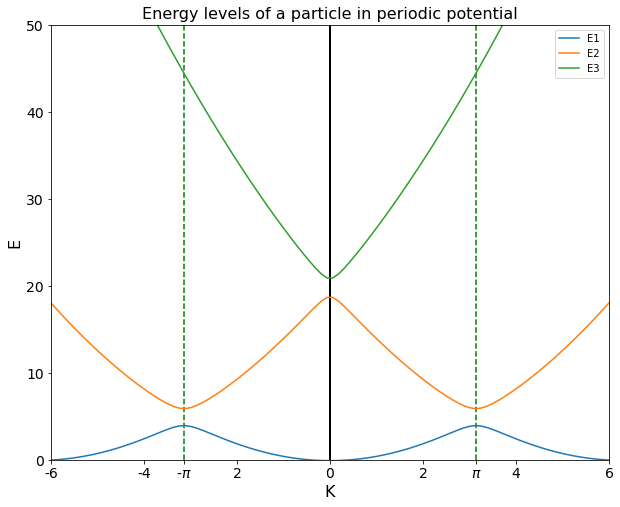

In [32]:
%matplotlib inline
#Making the plots
plt.figure(figsize=(10,8))
plt.plot(K, Ev1, label='E1')
plt.plot(K, Ev2, label='E2')
plt.plot(K, Ev3, label='E3')
plt.vlines(0,0,85, color='black', linewidth=2)
plt.vlines(np.pi,0,85, color='green', linestyle='dashed')
plt.vlines(-np.pi,0,85, color='green', linestyle='dashed')
plt.xlabel('K', fontsize=16)
plt.ylabel('E', fontsize=16)
plt.xlim(-6,6)
plt.xticks([-6,-4, -np.pi,-2, 0, 2, np.pi, 4,6],
     ['-6','-4','-$\pi$','2','0', '2', '$\pi$' ,'4','6'],
     fontsize=14)
plt.title('Energy levels of a particle in periodic potential', fontsize=16)
plt.yticks(fontsize=14)
plt.ylim(0,50)
plt.legend();

Making the plot a bit interactive.

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
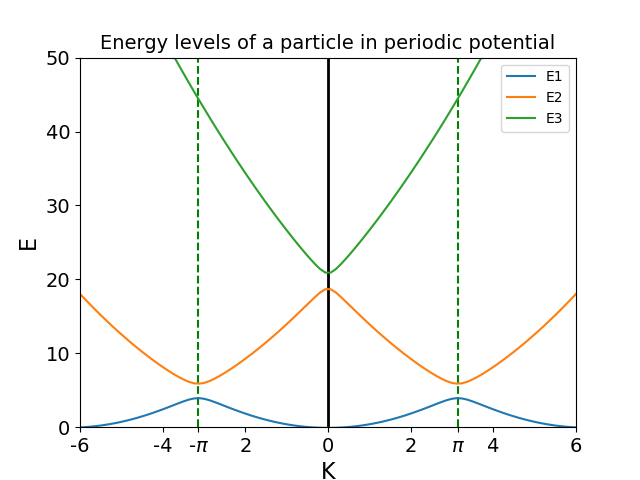

In [33]:
%matplotlib widget
#Making the plots
plt.plot(K, Ev1, label='E1')
plt.plot(K, Ev2, label='E2')
plt.plot(K, Ev3, label='E3')
plt.vlines(0,0,85, color='black', linewidth=2)
plt.vlines(np.pi,0,85, color='green', linestyle='dashed')
plt.vlines(-np.pi,0,85, color='green', linestyle='dashed')
plt.xlabel('K', fontsize=16)
plt.ylabel('E', fontsize=16)
plt.xlim(-6,6)
plt.xticks([-6,-4, -np.pi,-2, 0, 2, np.pi, 4,6],
     ['-6','-4','-$\pi$','2','0', '2', '$\pi$' ,'4','6'],
     fontsize=14)
plt.title('Energy levels of a particle in periodic potential', fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0,50)
plt.legend();